# 2020 Kaggle Data Science & Machine Learning Survey

* Every response to every question, no data filtering
* Click on the "Copy & Edit" button if you want to explore the data on your own!
* Can you identify any insights about any of the subgroups within the Kaggle community?

* *Step 1: Import Python libraries and load the data*

In [1]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)

def load_csv(base_dir,file_name):
    """Loads a CSV file into a Pandas DataFrame"""
    file_path = os.path.join(base_dir,file_name)
    df = pd.read_csv(file_path,low_memory=False)
    return df

# Load the data
base_dir = '/kaggle/input/'
file_name = 'kaggle_survey_2020_responses.csv'
survey_df = load_csv(base_dir,file_name)

# Preview the data
responses_df = survey_df[1:]
print('Total Number of Responses: ',responses_df.shape[0])
print('\nPreview of the data:')
survey_df.head(2)

Total Number of Responses:  20036

Preview of the data:


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_

*Step 2: Define helper functions*

In [2]:
def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    
    It has the following dependencies:
    numpy: 1.18.5; pandas: 1.1.3

    import numpy as np 
    import pandas as pd 
    '''
    
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    
    It has the following dependencies:
    numpy: 1.18.5; pandas: 1.1.3

    import numpy as np 
    import pandas as pd 
    '''
    
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary 

def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    '''
    A helper function to create a dataframe of either counts 
    or percentages, for a single multiple choice question.
    
    It has the following dependencies: 
    numpy: 1.18.5; pandas: 1.1.3
    
    import numpy as np 
    import pandas as pd  
    '''
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, 'Q3':rename_column}, axis='columns')
    return df

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.
    
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    
    It has the following dependencies:
    numpy: 1.18.5; pandas: 1.1.3

    import numpy as np 
    import pandas as pd 
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary

In [3]:
def plotly_bar_chart(response_counts,title,y_axis_title,orientation):
    '''
    This function creates a bar chart.
    
    It has the following dependencies:
    plotly express: 0.4.1
    
    import plotly.express as px
    '''
    response_counts_series = pd.Series(response_counts)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_layout(showlegend=False,
                      title={'text': title,
                             'y':0.95,
                             'x':0.5,})
    fig.show()

def plotly_choropleth_map(df, column, title, max_value):
    '''
    This function creates a choropleth map.
    
    It has the following dependencies:
    plotly express: 0.4.1
    
    import plotly.express as px
    '''
    fig = px.choropleth(df, 
                    locations = 'country',  
                    color = column,
                    locationmode = 'country names', 
                    color_continuous_scale = 'viridis',
                    title = title,
                    range_color = [0, max_value])
    fig.update(layout=dict(title=dict(x=0.5)))
    fig.show()


*Step 3: Create lists of answer choices and dictionaries of value counts (for the multiple choice multiple selection questions)*

* Feel free to copy/paste these lists and dictionaries into your own notebooks if you find that they are helpful for keeping track of all of the different answer choices.


In [4]:
# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.

q7_dictionary_of_counts = {
    'Python' : (responses_df['Q7_Part_1'].count()),
    'R': (responses_df['Q7_Part_2'].count()),
    'SQL' : (responses_df['Q7_Part_3'].count()),
    'C' : (responses_df['Q7_Part_4'].count()),
    'C++' : (responses_df['Q7_Part_5'].count()),
    'Java' : (responses_df['Q7_Part_6'].count()),
    'Javascript' : (responses_df['Q7_Part_7'].count()),
    'Julia' : (responses_df['Q7_Part_8'].count()),
    'Swift' : (responses_df['Q7_Part_9'].count()),
    'Bash' : (responses_df['Q7_Part_10'].count()),
    'MATLAB' : (responses_df['Q7_Part_11'].count()),
    'None' : (responses_df['Q7_Part_12'].count()),
    'Other' : (responses_df['Q7_OTHER'].count())
}

q9_dictionary_of_counts = {
    'JupyterLab' : (responses_df['Q9_Part_1'].count()),
    'RStudio': (responses_df['Q9_Part_2'].count()),
    'Visual Studio' : (responses_df['Q9_Part_3'].count()),
    'Visual Studio Code (VSCode)' : (responses_df['Q9_Part_4'].count()),
    'PyCharm' : (responses_df['Q9_Part_5'].count()),
    'Spyder' : (responses_df['Q9_Part_6'].count()),
    'Notepad++' : (responses_df['Q9_Part_7'].count()),
    'Sublime Text' : (responses_df['Q9_Part_8'].count()),
    'Vim, Emacs, or similar' : (responses_df['Q9_Part_9'].count()),
    'MATLAB' : (responses_df['Q9_Part_10'].count()),
    'None' : (responses_df['Q9_Part_11'].count()),
    'Other' : (responses_df['Q9_OTHER'].count())
}

q10_dictionary_of_counts = {
    'Kaggle Notebooks' : (responses_df['Q10_Part_1'].count()),
    'Colab Notebooks': (responses_df['Q10_Part_2'].count()),
    'Azure Notebooks' : (responses_df['Q10_Part_3'].count()),
    'Paperspace / Gradient' : (responses_df['Q10_Part_4'].count()),
    'Binder / JupyterHub' : (responses_df['Q10_Part_5'].count()),
    'Code Ocean' : (responses_df['Q10_Part_6'].count()),
    'IBM Watson Studio' : (responses_df['Q10_Part_7'].count()),
    'Amazon Sagemaker Studio' : (responses_df['Q10_Part_8'].count()),
    'Amazon EMR Notebooks' : (responses_df['Q10_Part_9'].count()),
    'Google Cloud AI Platform Notebooks' : (responses_df['Q10_Part_10'].count()),
    'Google Cloud Datalab Notebooks' : (responses_df['Q10_Part_11'].count()),
    'Databricks Collaborative Notebooks' : (responses_df['Q10_Part_12'].count()),
    'None' : (responses_df['Q10_Part_13'].count()),
    'Other' : (responses_df['Q10_OTHER'].count())
}

q12_dictionary_of_counts = {
    'GPUs' : (responses_df['Q12_Part_1'].count()),
    'TPUs': (responses_df['Q12_Part_2'].count()),
    'None' : (responses_df['Q12_Part_3'].count()),
    'Other' : (responses_df['Q12_OTHER'].count())
}

q14_dictionary_of_counts = {
    'Matplotlib' : (responses_df['Q14_Part_1'].count()),
    'Seaborn': (responses_df['Q14_Part_2'].count()),
    'Plotly / Plotly Express' : (responses_df['Q14_Part_3'].count()),
    'Ggplot / ggplot2' : (responses_df['Q14_Part_4'].count()),
    'Shiny' : (responses_df['Q14_Part_5'].count()),
    'D3.js' : (responses_df['Q14_Part_6'].count()),
    'Altair' : (responses_df['Q14_Part_7'].count()),
    'Bokeh' : (responses_df['Q14_Part_8'].count()),
    'Geoplotlib' : (responses_df['Q14_Part_9'].count()),
    'Leaflet / Folium' : (responses_df['Q14_Part_10'].count()),
    'None' : (responses_df['Q14_Part_11'].count()),
    'Other' : (responses_df['Q14_OTHER'].count())
}

q16_dictionary_of_counts = {
    'Scikit-learn' : (responses_df['Q16_Part_1'].count()),
    'TensorFlow': (responses_df['Q16_Part_2'].count()),
    'Keras' : (responses_df['Q16_Part_3'].count()),
    'PyTorch' : (responses_df['Q16_Part_4'].count()),
    'Fast.ai' : (responses_df['Q16_Part_5'].count()),
    'MXNet' : (responses_df['Q16_Part_6'].count()),
    'Xgboost' : (responses_df['Q16_Part_7'].count()),
    'LightGBM' : (responses_df['Q16_Part_8'].count()),
    'CatBoost' : (responses_df['Q16_Part_9'].count()),
    'Prophet' : (responses_df['Q16_Part_10'].count()),
    'H20-3' : (responses_df['Q16_Part_11'].count()),
    'Caret' : (responses_df['Q16_Part_12'].count()),
    'Tidymodels' : (responses_df['Q16_Part_13'].count()),
    'JAX' : (responses_df['Q16_Part_14'].count()),
    'None' : (responses_df['Q16_Part_15'].count()),
    'Other' : (responses_df['Q16_OTHER'].count())
}

q17_dictionary_of_counts = {
    'Linear or Logistic Regression' : (responses_df['Q17_Part_1'].count()),
    'Decision Trees or Random Forests': (responses_df['Q17_Part_2'].count()),
    'Gradient Boosting Machines (xgboost, lightgbm, etc)' : (responses_df['Q17_Part_3'].count()),
    'Bayesian Approaches' : (responses_df['Q17_Part_4'].count()),
    'Evolutionary Approaches' : (responses_df['Q17_Part_5'].count()),
    'Dense Neural Networks (MLPs, etc)' : (responses_df['Q17_Part_6'].count()),
    'Convolutional Neural Networks' : (responses_df['Q17_Part_7'].count()),
    'Generative Adversarial Networks' : (responses_df['Q17_Part_8'].count()),
    'Recurrent Neural Networks' : (responses_df['Q17_Part_9'].count()),
    'Transformer Networks (BERT, gpt-3, etc)' : (responses_df['Q17_Part_10'].count()),
    'None' : (responses_df['Q17_Part_11'].count()),
    'Other' : (responses_df['Q17_OTHER'].count())
}


q18_dictionary_of_counts = {
    'General purpose image/video tools (PIL, cv2, skimage, etc)' : (responses_df['Q18_Part_1'].count()),
    'Image segmentation methods (U-Net, Mask R-CNN, etc)': (responses_df['Q18_Part_2'].count()),
    'Object detection methods (YOLOv3, RetinaNet, etc)' : (responses_df['Q18_Part_3'].count()),
    'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)' : (responses_df['Q18_Part_4'].count()),
    'Generative Networks (GAN, VAE, etc)' : (responses_df['Q18_Part_5'].count()),
    'None' : (responses_df['Q18_Part_6'].count()),
    'Other' : (responses_df['Q18_OTHER'].count())
}


q19_dictionary_of_counts = {
    'Word embeddings/vectors (GLoVe, fastText, word2vec)' : (responses_df['Q19_Part_1'].count()),
    'Encoder-decoder models (seq2seq, vanilla transformers)': (responses_df['Q19_Part_2'].count()),
    'Contextualized embeddings (ELMo, CoVe)' : (responses_df['Q19_Part_3'].count()),
    'Transformer language models (GPT-3, BERT, XLnet, etc)' : (responses_df['Q19_Part_4'].count()),
    'None' : (responses_df['Q19_Part_5'].count()),
    'Other' : (responses_df['Q19_OTHER'].count())
}


q23_dictionary_of_counts = {
    'Analyze and understand data to influence product or business decisions' : (responses_df['Q23_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df['Q23_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df['Q23_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df['Q23_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df['Q23_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df['Q23_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df['Q23_Part_7'].count()),
    'Other' : (responses_df['Q23_OTHER'].count())
}


q26a_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_A_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_A_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_A_Part_10'].count()),
    'None' : (responses_df['Q26_A_Part_11'].count()),
    'Other' : (responses_df['Q26_A_OTHER'].count())
}

q26b_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_B_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_B_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_B_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_B_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_B_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_B_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_B_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_B_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_B_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_B_Part_10'].count()),
    'None' : (responses_df['Q26_B_Part_11'].count()),
    'Other' : (responses_df['Q26_B_OTHER'].count())
}

q27a_dictionary_of_counts = {
    'Amazon EC2' : (responses_df['Q27_A_Part_1'].count()),
    'AWS Lambda': (responses_df['Q27_A_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df['Q27_A_Part_3'].count()),
    'Azure Cloud Services' : (responses_df['Q27_A_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df['Q27_A_Part_5'].count()),
    'Azure Functions' : (responses_df['Q27_A_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df['Q27_A_Part_7'].count()),
    'Google Cloud Functions' : (responses_df['Q27_A_Part_8'].count()),
    'Google Cloud Run' : (responses_df['Q27_A_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df['Q27_A_Part_10'].count()),
    'No / None' : (responses_df['Q27_A_Part_11'].count()),
    'Other' : (responses_df['Q27_A_OTHER'].count())
}

q27b_dictionary_of_counts = {
    'Amazon EC2' : (responses_df['Q27_B_Part_1'].count()),
    'AWS Lambda': (responses_df['Q27_B_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df['Q27_B_Part_3'].count()),
    'Azure Cloud Services' : (responses_df['Q27_B_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df['Q27_B_Part_5'].count()),
    'Azure Functions' : (responses_df['Q27_B_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df['Q27_B_Part_7'].count()),
    'Google Cloud Functions' : (responses_df['Q27_B_Part_8'].count()),
    'Google Cloud Run' : (responses_df['Q27_B_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df['Q27_B_Part_10'].count()),
    'No / None' : (responses_df['Q27_B_Part_11'].count()),
    'Other' : (responses_df['Q27_B_OTHER'].count())
}

q28a_dictionary_of_counts = {
    'Amazon SageMaker' : (responses_df['Q28_A_Part_1'].count()),
    'Amazon Forecast': (responses_df['Q28_A_Part_2'].count()),
    'Amazon Rekognition' : (responses_df['Q28_A_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df['Q28_A_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df['Q28_A_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df['Q28_A_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df['Q28_A_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df['Q28_A_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df['Q28_A_Part_9'].count()),
    'No / None' : (responses_df['Q28_A_Part_10'].count()),
    'Other' : (responses_df['Q28_A_OTHER'].count())
}

q28b_dictionary_of_counts = {
    'Amazon SageMaker' : (responses_df['Q28_B_Part_1'].count()),
    'Amazon Forecast': (responses_df['Q28_B_Part_2'].count()),
    'Amazon Rekognition' : (responses_df['Q28_B_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df['Q28_B_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df['Q28_B_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df['Q28_B_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df['Q28_B_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df['Q28_B_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df['Q28_B_Part_9'].count()),
    'No / None' : (responses_df['Q28_B_Part_10'].count()),
    'Other' : (responses_df['Q28_B_OTHER'].count())
}


q29a_dictionary_of_counts = {
    'MySQL' : (responses_df['Q29_A_Part_1'].count()),
    'PostgreSQL': (responses_df['Q29_A_Part_2'].count()),
    'SQLite' : (responses_df['Q29_A_Part_3'].count()),
    'Oracle Database' : (responses_df['Q29_A_Part_4'].count()),
    'MongoDB' : (responses_df['Q29_A_Part_5'].count()),
    'Snowflake' : (responses_df['Q29_A_Part_6'].count()),
    'IBM Db2' : (responses_df['Q29_A_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df['Q29_A_Part_8'].count()),
    'Microsoft Access' : (responses_df['Q29_A_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (responses_df['Q29_A_Part_10'].count()),
    'Amazon Redshift' : (responses_df['Q29_A_Part_11'].count()),
    'Amazon Athena' : (responses_df['Q29_A_Part_12'].count()),
    'Amazon DynamoDB' : (responses_df['Q29_A_Part_13'].count()),
    'Google Cloud BigQuery' : (responses_df['Q29_A_Part_14'].count()),
    'Google Cloud SQL' : (responses_df['Q29_A_Part_15'].count()),
    'Google Cloud Firestore' : (responses_df['Q29_A_Part_16'].count()),
    'None' : (responses_df['Q29_A_Part_17'].count()),
    'Other' : (responses_df['Q29_A_OTHER'].count())
}


q29b_dictionary_of_counts = {
    'MySQL' : (responses_df['Q29_B_Part_1'].count()),
    'PostgreSQL': (responses_df['Q29_B_Part_2'].count()),
    'SQLite' : (responses_df['Q29_B_Part_3'].count()),
    'Oracle Database' : (responses_df['Q29_B_Part_4'].count()),
    'MongoDB' : (responses_df['Q29_B_Part_5'].count()),
    'Snowflake' : (responses_df['Q29_B_Part_6'].count()),
    'IBM Db2' : (responses_df['Q29_B_Part_7'].count()),
    'Microsoft SQL Server' : (responses_df['Q29_B_Part_8'].count()),
    'Microsoft Access' : (responses_df['Q29_B_Part_9'].count()),
    'Microsoft Azure Data Lake Storage' : (responses_df['Q29_B_Part_10'].count()),
    'Amazon Redshift' : (responses_df['Q29_B_Part_11'].count()),
    'Amazon Athena' : (responses_df['Q29_B_Part_12'].count()),
    'Amazon DynamoDB' : (responses_df['Q29_B_Part_13'].count()),
    'Google Cloud BigQuery' : (responses_df['Q29_B_Part_14'].count()),
    'Google Cloud SQL' : (responses_df['Q29_B_Part_15'].count()),
    'Google Cloud Firestore' : (responses_df['Q29_B_Part_16'].count()),
    'None' : (responses_df['Q29_B_Part_17'].count()),
    'Other' : (responses_df['Q29_B_OTHER'].count())
}

q31a_dictionary_of_counts = {
    'Amazon QuickSight' : (responses_df['Q31_A_Part_1'].count()),
    'Microsoft Power BI': (responses_df['Q31_A_Part_2'].count()),
    'Google Data Studio' : (responses_df['Q31_A_Part_3'].count()),
    'Looker' : (responses_df['Q31_A_Part_4'].count()),
    'Tableau' : (responses_df['Q31_A_Part_5'].count()),
    'Salesforce' : (responses_df['Q31_A_Part_6'].count()),
    'Einstein Analytics' : (responses_df['Q31_A_Part_7'].count()),
    'Qlik' : (responses_df['Q31_A_Part_8'].count()),
    'Domo' : (responses_df['Q31_A_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df['Q31_A_Part_10'].count()),
    'Alteryx' : (responses_df['Q31_A_Part_11'].count()),
    'Sisense' : (responses_df['Q31_A_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df['Q31_A_Part_13'].count()),
    'None' : (responses_df['Q31_A_Part_14'].count()),
    'Other' : (responses_df['Q31_A_OTHER'].count())
}

q31b_dictionary_of_counts = {
    'Amazon QuickSight' : (responses_df['Q31_B_Part_1'].count()),
    'Microsoft Power BI': (responses_df['Q31_B_Part_2'].count()),
    'Google Data Studio' : (responses_df['Q31_B_Part_3'].count()),
    'Looker' : (responses_df['Q31_B_Part_4'].count()),
    'Tableau' : (responses_df['Q31_B_Part_5'].count()),
    'Salesforce' : (responses_df['Q31_B_Part_6'].count()),
    'Einstein Analytics' : (responses_df['Q31_B_Part_7'].count()),
    'Qlik' : (responses_df['Q31_B_Part_8'].count()),
    'Domo' : (responses_df['Q31_B_Part_9'].count()),
    'TIBCO Spotfire' : (responses_df['Q31_B_Part_10'].count()),
    'Alteryx' : (responses_df['Q31_B_Part_11'].count()),
    'Sisense' : (responses_df['Q31_B_Part_12'].count()),
    'SAP Analytics Cloud' : (responses_df['Q31_B_Part_13'].count()),
    'None' : (responses_df['Q31_B_Part_14'].count()),
    'Other' : (responses_df['Q31_B_OTHER'].count())
}

q33a_dictionary_of_counts = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df['Q33_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df['Q33_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df['Q33_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df['Q33_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df['Q33_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df['Q33_A_Part_6'].count()),
    'No / None' : (responses_df['Q33_A_Part_7'].count()),
    'Other' : (responses_df['Q33_A_OTHER'].count())
}

q33b_dictionary_of_counts = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df['Q33_B_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df['Q33_B_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df['Q33_B_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df['Q33_B_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df['Q33_B_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df['Q33_B_Part_6'].count()),
    'No / None' : (responses_df['Q33_B_Part_7'].count()),
    'Other' : (responses_df['Q33_B_OTHER'].count())
}

q34a_dictionary_of_counts = {
    'Google Cloud AutoML' : (responses_df['Q34_A_Part_1'].count()),
    'H20 Driverless AI': (responses_df['Q34_A_Part_2'].count()),
    'Databricks AutoML' : (responses_df['Q34_A_Part_3'].count()),
    'DataRobot AutoML' : (responses_df['Q34_A_Part_4'].count()),
    'Tpot' : (responses_df['Q34_A_Part_5'].count()),
    'Auto-Keras' : (responses_df['Q34_A_Part_6'].count()),
    'Auto-Sklearn' : (responses_df['Q34_A_Part_7'].count()),
    'Auto_ml' : (responses_df['Q34_A_Part_8'].count()),
    'Xcessiv' : (responses_df['Q34_A_Part_9'].count()),
    'MLbox' : (responses_df['Q34_A_Part_10'].count()),
    'No / None' : (responses_df['Q34_A_Part_11'].count()),
    'Other' : (responses_df['Q34_A_OTHER'].count())
}

q34b_dictionary_of_counts = {
    'Google Cloud AutoML' : (responses_df['Q34_B_Part_1'].count()),
    'H20 Driverless AI': (responses_df['Q34_B_Part_2'].count()),
    'Databricks AutoML' : (responses_df['Q34_B_Part_3'].count()),
    'DataRobot AutoML' : (responses_df['Q34_B_Part_4'].count()),
    'Tpot' : (responses_df['Q34_B_Part_5'].count()),
    'Auto-Keras' : (responses_df['Q34_B_Part_6'].count()),
    'Auto-Sklearn' : (responses_df['Q34_B_Part_7'].count()),
    'Auto_ml' : (responses_df['Q34_B_Part_8'].count()),
    'Xcessiv' : (responses_df['Q34_B_Part_9'].count()),
    'MLbox' : (responses_df['Q34_B_Part_10'].count()),
    'No / None' : (responses_df['Q34_B_Part_11'].count()),
    'Other' : (responses_df['Q34_B_OTHER'].count())
}


q35a_dictionary_of_counts = {
    'Neptune.ai' : (responses_df['Q35_A_Part_1'].count()),
    'Weights & Biases': (responses_df['Q35_A_Part_2'].count()),
    'Comet.ml' : (responses_df['Q35_A_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df['Q35_A_Part_4'].count()),
    'TensorBoard' : (responses_df['Q35_A_Part_5'].count()),
    'Guild.ai' : (responses_df['Q35_A_Part_6'].count()),
    'Polyaxon' : (responses_df['Q35_A_Part_7'].count()),
    'Trains' : (responses_df['Q35_A_Part_8'].count()),
    'Domino Model Monitor' : (responses_df['Q35_A_Part_9'].count()),
    'No / None' : (responses_df['Q35_A_Part_10'].count()),
    'Other' : (responses_df['Q35_A_OTHER'].count())
}


q35b_dictionary_of_counts = {
    'Neptune.ai' : (responses_df['Q35_B_Part_1'].count()),
    'Weights & Biases': (responses_df['Q35_B_Part_2'].count()),
    'Comet.ml' : (responses_df['Q35_B_Part_3'].count()),
    'Sacred + Omniboard' : (responses_df['Q35_B_Part_4'].count()),
    'TensorBoard' : (responses_df['Q35_B_Part_5'].count()),
    'Guild.ai' : (responses_df['Q35_B_Part_6'].count()),
    'Polyaxon' : (responses_df['Q35_B_Part_7'].count()),
    'Trains' : (responses_df['Q35_B_Part_8'].count()),
    'Domino Model Monitor' : (responses_df['Q35_B_Part_9'].count()),
    'No / None' : (responses_df['Q35_B_Part_10'].count()),
    'Other' : (responses_df['Q35_B_OTHER'].count())
}

q36_dictionary_of_counts = {
    'Plotly Dash' : (responses_df['Q36_Part_1'].count()),
    'Streamlit': (responses_df['Q36_Part_2'].count()),
    'NBViewer' : (responses_df['Q36_Part_3'].count()),
    'GitHub' : (responses_df['Q36_Part_4'].count()),
    'Personal Blog' : (responses_df['Q36_Part_5'].count()),
    'Kaggle' : (responses_df['Q36_Part_6'].count()),
    'Colab' : (responses_df['Q36_Part_7'].count()),
    'Shiny' : (responses_df['Q36_Part_8'].count()),
    'None / I do not share my work publicly' : (responses_df['Q36_Part_9'].count()),
    'Other' : (responses_df['Q36_OTHER'].count())
}


q37_dictionary_of_counts = {
    'Coursera' : (responses_df['Q37_Part_1'].count()),
    'EdX': (responses_df['Q37_Part_2'].count()),
    'Kaggle Learn Courses' : (responses_df['Q37_Part_3'].count()),
    'DataCamp' : (responses_df['Q37_Part_4'].count()),
    'Fast.ai' : (responses_df['Q37_Part_5'].count()),
    'Udacity' : (responses_df['Q37_Part_6'].count()),
    'Udemy' : (responses_df['Q37_Part_7'].count()),
    'LinkedIn Learning' : (responses_df['Q37_Part_8'].count()),
    'Cloud-certification programs' : (responses_df['Q37_Part_9'].count()),
    'University Courses' : (responses_df['Q37_Part_10'].count()),
    'None' : (responses_df['Q37_Part_11'].count()),
    'Other' : (responses_df['Q37_OTHER'].count())
}


q39_dictionary_of_counts = {
    'Twitter (data science influencers)' : (responses_df['Q39_Part_1'].count()),
    'Email newsletters (Data Elixir, OReilly Data & AI, etc)': (responses_df['Q39_Part_2'].count()),
    'Reddit (r/machinelearning, etc)' : (responses_df['Q39_Part_3'].count()),
    'Kaggle (notebooks, forums, etc)' : (responses_df['Q39_Part_4'].count()),
    'Course Forums (forums.fast.ai, Coursera forums, etc)' : (responses_df['Q39_Part_5'].count()),
    'YouTube (Kaggle YouTube, Cloud AI Adventures, etc)' : (responses_df['Q39_Part_6'].count()),
    'Podcasts (Chai Time Data Science, OReilly Data Show, etc)' : (responses_df['Q39_Part_7'].count()),
    'Blogs (Towards Data Science, Analytics Vidhya, etc)' : (responses_df['Q39_Part_8'].count()),
    'Journal Publications (peer-reviewed journals, conference proceedings, etc)' : (responses_df['Q39_Part_9'].count()),
    'Slack Communities (ods.ai, kagglenoobs, etc)' : (responses_df['Q39_Part_10'].count()),
    'None' : (responses_df['Q39_Part_11'].count()),
    'Other' : (responses_df['Q39_OTHER'].count())
}


In [5]:
# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.

q7_list_of_columns = ['Q7_Part_1',
                      'Q7_Part_2',
                      'Q7_Part_3',
                      'Q7_Part_4',
                      'Q7_Part_5',
                      'Q7_Part_6',
                      'Q7_Part_7',
                      'Q7_Part_8',
                      'Q7_Part_9',
                      'Q7_Part_10',
                      'Q7_Part_11',
                      'Q7_Part_12',
                      'Q7_OTHER']

q9_list_of_columns = ['Q9_Part_1',
                      'Q9_Part_2',
                      'Q9_Part_3',
                      'Q9_Part_4',
                      'Q9_Part_5',
                      'Q9_Part_6',
                      'Q9_Part_7',
                      'Q9_Part_8',
                      'Q9_Part_9',
                      'Q9_Part_10',
                      'Q9_Part_11',
                      'Q9_OTHER']

q10_list_of_columns = ['Q10_Part_1',
                       'Q10_Part_2',
                       'Q10_Part_3',
                       'Q10_Part_4',
                       'Q10_Part_5',
                       'Q10_Part_6',
                       'Q10_Part_7',
                       'Q10_Part_8',
                       'Q10_Part_9',
                       'Q10_Part_10',
                       'Q10_Part_11',
                       'Q10_Part_12',
                       'Q10_Part_13',
                       'Q10_OTHER']

q12_list_of_columns = ['Q12_Part_1',
                            'Q12_Part_2',
                            'Q12_Part_3',
                            'Q12_OTHER']

q14_list_of_columns = ['Q14_Part_1',
                            'Q14_Part_2',
                            'Q14_Part_3',
                            'Q14_Part_4',
                            'Q14_Part_5',
                            'Q14_Part_6',
                            'Q14_Part_7',
                            'Q14_Part_8',
                            'Q14_Part_9',
                            'Q14_Part_10',
                            'Q14_Part_11',
                            'Q14_OTHER']

q16_list_of_columns = ['Q16_Part_1',
                       'Q16_Part_2',
                       'Q16_Part_3',
                       'Q16_Part_4',
                       'Q16_Part_5',
                       'Q16_Part_6',
                       'Q16_Part_7',
                       'Q16_Part_8',
                       'Q16_Part_9',
                       'Q16_Part_10',
                       'Q16_Part_11',
                       'Q16_Part_12',
                       'Q16_Part_13',
                       'Q16_Part_14',
                       'Q16_Part_15',
                       'Q16_OTHER']

q17_list_of_columns = ['Q17_Part_1',
                       'Q17_Part_2',
                       'Q17_Part_3',
                       'Q17_Part_4',
                       'Q17_Part_5',
                       'Q17_Part_6',
                       'Q17_Part_7',
                       'Q17_Part_8',
                       'Q17_Part_9',
                       'Q17_Part_10',
                       'Q17_Part_11',
                       'Q17_OTHER']

q18_list_of_columns = ['Q18_Part_1',
                       'Q18_Part_2',
                       'Q18_Part_3',
                       'Q18_Part_4',
                       'Q18_Part_5',
                       'Q18_Part_6',
                       'Q18_OTHER']

q19_list_of_columns = ['Q19_Part_1',
                       'Q19_Part_2',
                       'Q19_Part_3',
                       'Q19_Part_4',
                       'Q19_Part_5',
                       'Q19_OTHER']

q23_list_of_columns = ['Q23_Part_1',
                       'Q23_Part_2',
                       'Q23_Part_3',
                       'Q23_Part_4',
                       'Q23_Part_5',
                       'Q23_Part_6',
                       'Q23_Part_7',
                       'Q23_OTHER']

q26a_list_of_columns = ['Q26_A_Part_1',
                        'Q26_A_Part_2',
                        'Q26_A_Part_3',
                        'Q26_A_Part_4',
                        'Q26_A_Part_5',
                        'Q26_A_Part_6',
                        'Q26_A_Part_7',
                        'Q26_A_Part_8',
                        'Q26_A_Part_9',
                        'Q26_A_Part_10',
                        'Q26_A_Part_11',
                        'Q26_A_OTHER']

q26b_list_of_columns = ['Q26_B_Part_1',
                        'Q26_B_Part_2',
                        'Q26_B_Part_3',
                        'Q26_B_Part_4',
                        'Q26_B_Part_5',
                        'Q26_B_Part_6',
                        'Q26_B_Part_7',
                        'Q26_B_Part_8',
                        'Q26_B_Part_9',
                        'Q26_B_Part_10',
                        'Q26_B_Part_11',
                        'Q26_B_OTHER']

q27a_list_of_columns = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']

q27b_dictionary_of_counts = ['Q27_B_Part_1',
                             'Q27_B_Part_2',
                             'Q27_B_Part_3',
                             'Q27_B_Part_4',
                             'Q27_B_Part_5',
                             'Q27_B_Part_6',
                             'Q27_B_Part_7',
                             'Q27_B_Part_8',
                             'Q27_B_Part_9',
                             'Q27_B_Part_10',
                             'Q27_B_Part_11',
                             'Q27_B_OTHER']

q28a_list_of_columns = ['Q28_A_Part_1',
                        'Q28_A_Part_2',
                        'Q28_A_Part_3',
                        'Q28_A_Part_4',
                        'Q28_A_Part_5',
                        'Q28_A_Part_6',
                        'Q28_A_Part_7',
                        'Q28_A_Part_8',
                        'Q28_A_Part_9',
                        'Q28_A_Part_10',
                        'Q28_A_OTHER']

q28b_list_of_columns = ['Q28_B_Part_1',
                        'Q28_B_Part_2',
                        'Q28_B_Part_3',
                        'Q28_B_Part_4',
                        'Q28_B_Part_5',
                        'Q28_B_Part_6',
                        'Q28_B_Part_7',
                        'Q28_B_Part_8',
                        'Q28_B_Part_9',
                        'Q28_B_Part_10',
                        'Q28_B_OTHER']

q29a_list_of_columns = ['Q29_A_Part_1',
                        'Q29_A_Part_2',
                        'Q29_A_Part_3',
                        'Q29_A_Part_4',
                        'Q29_A_Part_5',
                        'Q29_A_Part_6',
                        'Q29_A_Part_7',
                        'Q29_A_Part_8',
                        'Q29_A_Part_9',
                        'Q29_A_Part_10',
                        'Q29_A_Part_11',
                        'Q29_A_Part_12',
                        'Q29_A_Part_13',
                        'Q29_A_Part_14',
                        'Q29_A_Part_15',
                        'Q29_A_Part_16',
                        'Q29_A_Part_17',
                        'Q29_A_OTHER']

q29b_list_of_columns = ['Q29_B_Part_1',
                        'Q29_B_Part_2',
                        'Q29_B_Part_3',
                        'Q29_B_Part_4',
                        'Q29_B_Part_5',
                        'Q29_B_Part_6',
                        'Q29_B_Part_7',
                        'Q29_B_Part_8',
                        'Q29_B_Part_9',
                        'Q29_B_Part_10',
                        'Q29_B_Part_11',
                        'Q29_B_Part_12',
                        'Q29_B_Part_13',
                        'Q29_B_Part_14',
                        'Q29_B_Part_15',
                        'Q29_B_Part_16',
                        'Q29_B_Part_17',
                        'Q29_B_OTHER']

q31a_list_of_columns = ['Q31_A_Part_1',
                        'Q31_A_Part_2',
                        'Q31_A_Part_3',
                        'Q31_A_Part_4',
                        'Q31_A_Part_5',
                        'Q31_A_Part_6',
                        'Q31_A_Part_7',
                        'Q31_A_Part_8',
                        'Q31_A_Part_9',
                        'Q31_A_Part_10',
                        'Q31_A_Part_11',
                        'Q31_A_Part_12',
                        'Q31_A_Part_13',
                        'Q31_A_Part_14',
                        'Q31_A_OTHER']

q31b_list_of_columns = ['Q31_B_Part_1',
                        'Q31_B_Part_2',
                        'Q31_B_Part_3',
                        'Q31_B_Part_4',
                        'Q31_B_Part_5',
                        'Q31_B_Part_6',
                        'Q31_B_Part_7',
                        'Q31_B_Part_8',
                        'Q31_B_Part_9',
                        'Q31_B_Part_10',
                        'Q31_B_Part_11',
                        'Q31_B_Part_12',
                        'Q31_B_Part_13',
                        'Q31_B_Part_14',
                        'Q31_B_OTHER']

q33a_list_of_columns = ['Q33_A_Part_1',
                        'Q33_A_Part_2',
                        'Q33_A_Part_3',
                        'Q33_A_Part_4',
                        'Q33_A_Part_5',
                        'Q33_A_Part_6',
                        'Q33_A_Part_7',
                        'Q33_A_OTHER']

q33b_list_of_columns = ['Q33_B_Part_1',
                        'Q33_B_Part_2',
                        'Q33_B_Part_3',
                        'Q33_B_Part_4',
                        'Q33_B_Part_5',
                        'Q33_B_Part_6',
                        'Q33_B_Part_7',
                        'Q33_B_OTHER']

q34a_list_of_columns = ['Q34_A_Part_1',
                        'Q34_A_Part_2',
                        'Q34_A_Part_3',
                        'Q34_A_Part_4',
                        'Q34_A_Part_5',
                        'Q34_A_Part_6',
                        'Q34_A_Part_7',
                        'Q34_A_Part_8',
                        'Q34_A_Part_9',
                        'Q34_A_Part_10',
                        'Q34_A_Part_11',
                        'Q34_A_OTHER']

q34b_list_of_columns = ['Q34_B_Part_1',
                        'Q34_B_Part_2',
                        'Q34_B_Part_3',
                        'Q34_B_Part_4',
                        'Q34_B_Part_5',
                        'Q34_B_Part_6',
                        'Q34_B_Part_7',
                        'Q34_B_Part_8',
                        'Q34_B_Part_9',
                        'Q34_B_Part_10',
                        'Q34_B_Part_11',
                        'Q34_B_OTHER']


q35a_list_of_columns = ['Q35_A_Part_1',
                        'Q35_A_Part_2',
                        'Q35_A_Part_3',
                        'Q35_A_Part_4',
                        'Q35_A_Part_5',
                        'Q35_A_Part_6',
                        'Q35_A_Part_7',
                        'Q35_A_Part_8',
                        'Q35_A_Part_9',
                        'Q35_A_Part_10',
                        'Q35_A_OTHER']

q35b_list_of_columns = ['Q35_B_Part_1',
                        'Q35_B_Part_2',
                        'Q35_B_Part_3',
                        'Q35_B_Part_4',
                        'Q35_B_Part_5',
                        'Q35_B_Part_6',
                        'Q35_B_Part_7',
                        'Q35_B_Part_8',
                        'Q35_B_Part_9',
                        'Q35_B_Part_10',
                        'Q35_B_OTHER']

q36_list_of_columns = ['Q36_Part_1',
                       'Q36_Part_2',
                       'Q36_Part_3',
                       'Q36_Part_4',
                       'Q36_Part_5',
                       'Q36_Part_6',
                       'Q36_Part_7',
                       'Q36_Part_8',
                       'Q36_Part_9',
                       'Q36_OTHER']

q37_list_of_columns = ['Q37_Part_1',
                       'Q37_Part_2',
                       'Q37_Part_3',
                       'Q37_Part_4',
                       'Q37_Part_5',
                       'Q37_Part_6',
                       'Q37_Part_7',
                       'Q37_Part_8',
                       'Q37_Part_9',
                       'Q37_Part_10',
                       'Q37_Part_11',
                       'Q37_OTHER']

q39_list_of_columns = ['Q39_Part_1',
                       'Q39_Part_2',
                       'Q39_Part_3',
                       'Q39_Part_4',
                       'Q39_Part_5',
                       'Q39_Part_6',
                       'Q39_Part_7',
                       'Q39_Part_8',
                       'Q39_Part_9',
                       'Q39_Part_10',
                       'Q39_Part_11',
                       'Q39_OTHER']

*Step 4: Create a map of response counts and response percentages*

In [6]:
responses_per_country_df = create_dataframe_of_counts(survey_df,'Q3','country','# of respondents',return_percentages=False)
percentages_per_country_df = create_dataframe_of_counts(survey_df,'Q3','country','% of respondents',return_percentages=True)

plotly_choropleth_map(responses_per_country_df, 
                       '# of respondents', 
                       'Total number of responses per country (2020 Kaggle DS & ML Survey)',
                        max_value = 1000)
plotly_choropleth_map(percentages_per_country_df, 
                       '% of respondents', 
                       'Percentage of total responses for most common countries',
                        max_value = 5)
print('Note that countries with less than 50 responses were replaced with the country name "other" (which does not show up on this map)')

Note that countries with less than 50 responses were replaced with the country name "other" (which does not show up on this map)


*Step 5: Create bar graphs for every question from the 2020 Kaggle DS & ML Survey*

In [7]:
question_name = 'Q1'
percentages = count_then_return_percent(responses_df,question_name).sort_index()
title_for_chart = 'Age Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [8]:
question_name = 'Q2'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Gender Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [9]:
question_name = 'Q3'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1][40:]
title_for_chart = 'Most Common Nationalities'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [10]:
question_name = 'Q4'
responses_in_order = ["I prefer not to answer","No formal education past high school",
                      "Some college/university study without earning a bachelor’s degree",
                      "Bachelor’s degree","Master’s degree","Doctoral degree","Professional degree"]
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Most Common Degree Type'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [11]:
question_name = 'Q5'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Most Common Job Titles'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [12]:
USA_responses_df = responses_df[responses_df['Q3']=='United States of America'] 
question_name = 'Q5'
sorted_percentages = count_then_return_percent(USA_responses_df,question_name).iloc[::-1]
title_for_chart = 'Most Common Job Titles for Kagglers from USA'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

India_responses_df = responses_df[responses_df['Q3']=='India'] 
question_name = 'Q5'
sorted_percentages = count_then_return_percent(India_responses_df,question_name).iloc[::-1]
title_for_chart = 'Most Common Job Titles for Kagglers from India'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [13]:
question_name = 'Q6'
title_for_chart = 'Programming Experience'
title_for_y_axis = '% of respondents'
responses_in_order = ['I have never written code',
                      '< 1 years','1-2 years','3-5 years',
                      '5-10 years','10-20 years','20+ years']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [14]:
question_name = 'Q7'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q7_list_of_columns,
                                                  q7_dictionary_of_counts)
title_for_chart = 'Most Popular Progamming Languages'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [15]:
question_name = 'Q8'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Which language should you learn first?'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [16]:
question_name = 'Q9'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q9_list_of_columns,
                                                  q9_dictionary_of_counts)
title_for_chart = "Most Popular Data Science IDE's"
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [17]:
question_name = 'Q10'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q10_list_of_columns,
                                                  q10_dictionary_of_counts)
title_for_chart = "Most Popular Hosted Notebook Products"
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [18]:
question_name = 'Q11'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Most popular computing platforms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [19]:
question_name = 'Q12'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q12_list_of_columns,
                                                  q12_dictionary_of_counts)
title_for_chart = 'Most common accelerator type'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [20]:
question_name = 'Q13'
responses_in_order = ['Never','Once','2-5 times','6-25 times','More than 25 times']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Number of times using a TPU'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [21]:
question_name = 'Q14'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q14_list_of_columns,
                                                  q14_dictionary_of_counts)
title_for_chart = 'Most common data visualization tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [22]:
question_name = 'Q15'
responses_in_order = ['I do not use machine learning methods',
                      'Under 1 year','1-2 years','2-3 years',
                      '3-4 years','4-5 years','5-10 years',
                     '10-20 years', '20 or more years']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Number of years using ML methods'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [23]:
question_name = 'Q16'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q16_list_of_columns,
                                                  q16_dictionary_of_counts)
title_for_chart = 'Most common machine learning frameworks'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [24]:
question_name = 'Q17'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q17_list_of_columns,
                                                  q17_dictionary_of_counts)
title_for_chart = 'Most common machine learning algorithms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [25]:
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q18_list_of_columns,
                                                  q18_dictionary_of_counts)
title_for_chart = 'Most common computer vision methods'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [26]:
question_name = 'Q19'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q19_list_of_columns,
                                                  q19_dictionary_of_counts)
title_for_chart = 'Most common NLP methods'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [27]:
question_name = 'Q20'
responses_in_order = ['0-49 employees',
                      '50-249 employees','250-999 employees',
                      "1000-9,999 employees","10,000 or more employees"]
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Size of employer'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [28]:
question_name = 'Q21'
responses_in_order = ['0','1-2','3-4','5-9','10-14','15-19','20+']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Size of data science team'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [29]:
question_name = 'Q22'
responses_in_order = ['I do not know','No (we do not use ML methods)',
    'We are exploring ML methods (and may one day put a model into production)',
    'We use ML methods for generating insights (but do not put working models into production)',
    'We recently started using ML methods (i.e., models in production for less than 2 years)',
    'We have well established ML methods (i.e., models in production for more than 2 years)']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Maturity of data science organization'
y_axis_title = '% of respondents'
orientation_for_chart = 'v'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [30]:
question_name = 'Q23'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q23_list_of_columns,
                                                  q23_dictionary_of_counts)
title_for_chart = 'Most Common Job Duties'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [31]:
question_name = 'Q24'
responses_in_order = ['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-500,000',
                        '> $500,000']
unsorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Salary Distributions on Kaggle'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=unsorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [32]:
USA_responses_df = responses_df[responses_df['Q3']=='United States of America'] 
question_name = 'Q24'
responses_in_order = ['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-500,000',
                        '> $500,000']
unsorted_percentages = count_then_return_percent(USA_responses_df,question_name)[responses_in_order]
title_for_chart = 'Salary Distributions in the USA'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=unsorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

#######

India_responses_df = responses_df[responses_df['Q3']=='India'] 
question_name = 'Q24'
responses_in_order = ['$0-999',
                        '1,000-1,999',
                        '2,000-2,999',
                        '3,000-3,999',
                        '4,000-4,999',
                        '5,000-7,499',
                        '7,500-9,999',
                        '10,000-14,999',
                        '15,000-19,999',
                        '20,000-24,999',
                        '25,000-29,999',
                        '30,000-39,999',
                        '40,000-49,999',
                        '50,000-59,999',
                        '60,000-69,999',
                        '70,000-79,999',
                        '80,000-89,999',
                        '90,000-99,999',
                        '100,000-124,999',
                        '125,000-149,999',
                        '150,000-199,999',
                        '200,000-249,999',
                        '250,000-299,999',
                        '300,000-500,000',
                        '> $500,000']
unsorted_percentages = count_then_return_percent(India_responses_df,question_name)[responses_in_order]
title_for_chart = 'Salary Distributions in India'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=unsorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [33]:
question_name = 'Q25'
responses_in_order = ['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']
sorted_percentages = count_then_return_percent(responses_df,question_name)[responses_in_order]
title_for_chart = 'Money spent on cloud computing products'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [34]:
USA_responses_df = responses_df[responses_df['Q3']=='United States of America'] 
question_name = 'Q25'
responses_in_order = ['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']
sorted_percentages = count_then_return_percent(USA_responses_df,question_name)[responses_in_order]
title_for_chart = 'Money spent on cloud computing products in the USA'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

India_responses_df = responses_df[responses_df['Q3']=='India'] 
question_name = 'Q25'
responses_in_order = ['$0 ($USD)','$1-$99','$100-$999','$1000-$9,999','$10,000-$99,999','$100,000 or more ($USD)']
sorted_percentages = count_then_return_percent(India_responses_df,question_name)[responses_in_order]
title_for_chart = 'Money spent on cloud computing products in India'
y_axis_title = '% of respondents'
orientation_for_chart = 'h'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [35]:
question_name = 'Q26-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q26a_list_of_columns,
                                                  q26a_dictionary_of_counts)
title_for_chart = 'Most Popular Cloud Computing Platforms'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [36]:
question_name = 'Q27-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q27a_list_of_columns,
                                                  q27a_dictionary_of_counts)
title_for_chart = 'Specific Cloud Computing Products (AWS/Azure/GCP customers only)'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [37]:
question_name = 'Q28-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q28a_list_of_columns,
                                                  q28a_dictionary_of_counts)
title_for_chart = 'Specific Machine Learning Products (AWS/Azure/GCP customers only)'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [38]:
question_name = 'Q29-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q29a_list_of_columns,
                                                  q29a_dictionary_of_counts)
title_for_chart = 'Most Popular Database / Data Warehouse Products'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [39]:
def plotly_bar_chart_with_x_axis_limit(response_counts,title,y_axis_title,orientation,limit_for_axis):
    '''
    A slightly modified version of plotly_bar_chart().
    
    It has the following dependencies:
    plotly express: 0.4.1
    
    import plotly.express as px
    '''
    response_counts_series = pd.Series(response_counts)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_xaxes(range=[0, limit_for_axis])
    fig.update_layout(showlegend=False,
                      title={'text': title,
                             'y':0.95,
                             'x':0.5,})
    fig.show()

In [40]:
question_name = 'Q30'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Specific database / data warehouse product used most often'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
limit_for_axis = 20

plotly_bar_chart_with_x_axis_limit(sorted_percentages,title_for_chart,title_for_y_axis,orientation_for_chart,limit_for_axis)

In [41]:
question_name = 'Q31-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q31a_list_of_columns,
                                                  q31a_dictionary_of_counts)
title_for_chart = 'Most Popular Business Intelligence Tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [42]:
def plotly_bar_chart_with_x_axis_limit(response_counts,title,y_axis_title,orientation,limit_for_axis):
    '''
    A slightly modified version of plotly_bar_chart().
    
    It has the following dependencies:
    plotly express: 0.4.1
    
    import plotly.express as px
    '''
    response_counts_series = pd.Series(response_counts)
    fig = px.bar(response_counts_series,
             labels={"index": '',"value": y_axis_title},
             text=response_counts_series.values,
             orientation=orientation,)
    fig.update_xaxes(range=[0, limit_for_axis])
    fig.update_layout(showlegend=False,
                      title={'text': title,
                             'y':0.95,
                             'x':0.5,})
    fig.show()

In [43]:
question_name = 'Q32'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Specific business intelligence product used most often'
title_for_x_axis = '% of respondents'
orientation_for_chart = 'h'
limit_for_axis = 40 

plotly_bar_chart_with_x_axis_limit(sorted_percentages,title_for_chart,title_for_y_axis,orientation_for_chart,limit_for_axis)

In [44]:
question_name = 'Q33-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q33a_list_of_columns,
                                                  q33a_dictionary_of_counts)
title_for_chart = 'Most common categories of AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [45]:
question_name = 'Q34-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q34a_list_of_columns,
                                                  q34a_dictionary_of_counts)
title_for_chart = 'Most popular AutoML (or partial AutoML) products'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [46]:
question_name = 'Q35-A'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q35a_list_of_columns,
                                                  q35a_dictionary_of_counts)
title_for_chart = 'Most popular tools for managing ML experiments'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [47]:
question_name = 'Q36'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q36_list_of_columns,
                                                  q36_dictionary_of_counts)
title_for_chart = 'Popular platforms for sharing data science projects'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [48]:
question_name = 'Q37'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q37_list_of_columns,
                                                  q37_dictionary_of_counts)
title_for_chart = 'Most Popular Educational Platforms'
title_for_x_axis = '% of respondents'
orientation_for_chart = 'h'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [49]:
question_name = 'Q38'
sorted_percentages = count_then_return_percent(responses_df,question_name).iloc[::-1]
title_for_chart = 'Primary tool used to analyze data'
y_axis_title = '% of respondents'
orientation_for_chart = 'v'

plotly_bar_chart(response_counts=sorted_percentages,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

In [50]:
question_name = 'Q39'
dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q39_list_of_columns,
                                                  q39_dictionary_of_counts)
title_for_chart = 'Most Popular Data Science Media Sources'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'v'
  
plotly_bar_chart(response_counts=dictionary_of_counts,
                 title=title_for_chart,
                 y_axis_title=title_for_y_axis,
                 orientation=orientation_for_chart) 

The median response time was approximately 10.0 minutes.
The total number of respondents that took more than 5 minutes was 16707


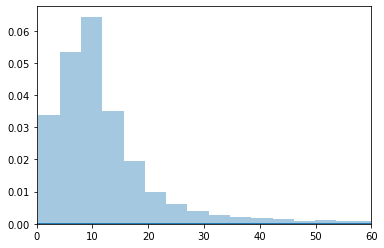

In [51]:
# Plot a histogram of user response times (~10m average)
responses_only_duration = responses_df['Time from Start to Finish (seconds)']
responses_only_duration = pd.DataFrame(pd.to_numeric(responses_only_duration, errors='coerce')/60)
sns.distplot(responses_only_duration,bins=5000).set(xlim=(0, 60))
median = round(responses_df['Time from Start to Finish (seconds)'].median()/60,0)
print('The median response time was approximately',median,'minutes.')
filtered_responses_df = pd.DataFrame(pd.to_numeric(responses_df['Time from Start to Finish (seconds)'], errors='coerce'))
filtered_responses_df = filtered_responses_df[filtered_responses_df['Time from Start to Finish (seconds)'] > 299]  
print('The total number of respondents that took more than 5 minutes was',filtered_responses_df.shape[0])

**Future directions to consider:**
* Divide the population into interesting subgroups and identify interesting insights.

 * Do students have different preferences as compared to professionals?
 * Do GCP customers have different preferences as compared to AWS customers?
 * Which cloud computing platforms have seen the most growth in recent years?
 * Do salaries scale according to experience levels?  What traits might predict having a very high salary?

 

**Credits / Attribution:**

* This notebooks uses the [2020 Kaggle DS & ML Survey dataset](https://www.kaggle.com/c/kaggle-survey-2020).  Specifically, [pandas](https://pandas.pydata.org/pandas-docs/stable/) is used to  manipulate the data and [plotly](https://plotly.com/python/) is used to visualize the data.
* The idea to organize the value_counts() into dictionaries came from [a notebook that was authored by @sonmou](https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science) using the [2019 Kaggle DS & ML challenge dataset](https://www.kaggle.com/c/kaggle-survey-2019).  I liked this approach because the dictionaries themselves are useful artifacts that can be reused by other competitors and also they can be used to provide a quick way to review all of the different answer choices for each individual question.  You can find these dictionaries in code cell number four if you want to paste them into your own notebook.   Hopefully others will also find this approach to be helpful!
* This notebook (and every other public notebook on Kaggle) was released under an [Apache 2.0 license](https://www.apache.org/licenses/LICENSE-2.0). 

In [52]:
!mkdir /kaggle/working/docker/
!pip freeze > '/kaggle/working/docker/requirements.txt'
print('This notebook makes use of \nthe following Python libraries:\n')
print('numpy:',np.__version__)
print('pandas:',pd.__version__)
print('seaborn:',sns.__version__)
import plotly_express as px
print('plotly express:',px.__version__)
survey_df.to_csv('2020_kaggle_ds_and_ml_survey_responses_only.csv',index=False)

This notebook makes use of 
the following Python libraries:

numpy: 1.18.5
pandas: 1.1.4
seaborn: 0.10.0
plotly express: 0.4.1
